In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def energy(system, i, j, L):
    """Energy function of spins connected to site (i, j)."""
    return -1. * system[i, j] * (system[np.mod(i - 1, L), j] + system[np.mod(i + 1, L), j] +
                                 system[i, np.mod(j - 1, L)] + system[i, np.mod(j + 1, L)])

In [5]:
def prepare_system(L):
    """Initialize the system."""
    system = 2 * (0.5 - np.random.randint(0, 2, size=[L, L]))
    return system

In [6]:
def measure_energy(system):
    L = system.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            E += energy(system, i, j, L) / 2.
    return E

In [7]:
def metropolis_loop(system, T, N_sweeps, N_eq, N_flips):
    """ Main loop doing the Metropolis algorithm."""
    E = measure_energy(system)
    L = system.shape[0]
    E_list = []
    for step in range(N_sweeps + N_eq):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        dE = -2. * energy(system, i, j, L)
        if dE <= 0.:
            system[i, j] *= -1
            E += dE
        elif np.exp(-1. / T * dE) > np.random.rand():
            system[i, j] *= -1
            E += dE

        if step >= N_eq and np.mod(step, N_flips) == 0:
            # measurement
            E_list.append(E)
    return np.array(E_list)

1.5 -31.392 [0.23430471111111079, 0.049597632739494725]
1.6 -30.648 [0.2376948437499998, 0.017839868579671334]
1.7000000000000002 -30.648 [0.37861024221453216, 0.038172065509156514]
1.8000000000000003 -30.048 [0.3681329629629623, 0.02372796507944708]
1.9000000000000004 -29.608 [0.504566094182825, 0.05326286434359409]
2.0000000000000004 -26.896 [0.6404043999999995, 0.039022509045216446]
2.1000000000000005 -25.504 [0.7284897959183672, 0.052422205226098244]
2.2000000000000006 -25.976 [0.7525491735537182, 0.02893181424446801]
2.3000000000000007 -24.008 [0.7631556899810963, 0.020216282892968545]
2.400000000000001 -22.944 [0.8434477083333329, 0.01638285813712686]
2.500000000000001 -22.632 [0.8168830079999998, 0.026501792174945377]
2.600000000000001 -20.384 [0.7599385207100587, 0.025981940729210905]
2.700000000000001 -18.376 [0.7695484773662545, 0.009712345529390327]
2.800000000000001 -18.856 [0.7015759693877544, 0.01510544619277047]
2.9000000000000012 -16.528 [0.6354799999999995, 0.008020612

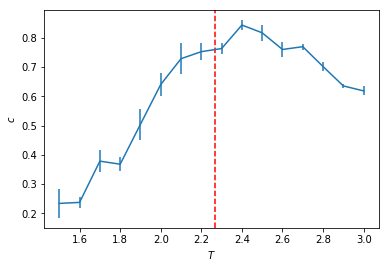

In [8]:
if __name__ == "__main__":
    """ Scan through some temperatures """
    # Set parameters here
    L = 4  # Linear system size
    N_sweeps = 5000  # Number of steps for the measurements
    N_eq = 1000  # Number of equilibration steps before the measurements start
    N_flips = 10  # Number of steps between measurements
    N_bins = 10  # Number of bins use for the error analysis

    T_range = np.arange(1.5, 3.1, 0.1)

    C_list = []
    system = prepare_system(L)
    #aqui es donde se miden los observables 
    for T in T_range:
        C_list_bin = []
        for k in range(N_bins):
            Es = metropolis_loop(system, T, N_sweeps, N_eq, N_flips)

            mean_E = np.mean(Es)
            mean_E2 = np.mean(Es**2)

            C_list_bin.append(1. / T**2. / L**2. * (mean_E2 - mean_E**2))
        C_list.append([np.mean(C_list_bin), np.std(C_list_bin) / np.sqrt(N_bins)])

        print(T, mean_E, C_list[-1])

    # Plot the results
    C_list = np.array(C_list)
    plt.errorbar(T_range, C_list[:, 0], C_list[:, 1])
    Tc = 2. / np.log(1. + np.sqrt(2))
    print(Tc)
    plt.axvline(Tc, color='r', linestyle='--')
    plt.xlabel('$T$')
    plt.ylabel('$c$')
    plt.show()

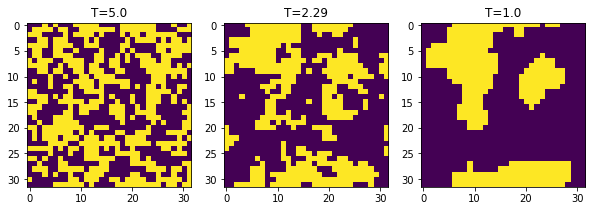

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
system = prepare_system(32)
Ts =  [5., 2.29, 1.]
for i in range(3):
    T = Ts[i]
    metropolis_loop(system, T, 10000, 1000, 10)  # get typical configurations
    axes[i].imshow(system)   # plot it
    axes[i].set_title("T="+str(T))
plt.show()